# Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.


If we have a matrix A of (n*k) and another matrix B of (k*m), then for each element of the resulting matrix, we perform k times multiplications of an element of A with each corresponding value from B. Since there are (n*m) a number of elements in the resulting matrix, therefore, the number of multiplications we perform is " n*m*k. " 

For addition, we perform (k-1) times the addition of all multiplied value for a particular resulting element. Since there are (n*m) numbers of elements in the resulting matrix, then, we perform (n * m * (k-1)) additions. 

# Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [70]:
# Suppose we have a matrix A and matrix B with n = 2, m= 3, k=2.
n=2
m=3
k=2
import random
import numpy as np
import time
A = [[random.randint(1,10) for i in range(k)]for j in range(n)]
B = [[random.randint(1,10) for i in range(m)]for j in range(k)]

#multiplying this two matrix with list of list
C = [[0 for i in range(m)]for l in range(n)]
start1 = time.time() 
for i in range(n):
    for j  in range(m):
        for l in range(k):
            C[i][j] += (A[i][l]) * (B[l][j])
end1 = time.time()

print("Using list of list:")            
print("Matrix A is: ",A)
print("Matrix B is: ",B)
print("Resulting Matrix C is: ",C)
print(f'time taken by list of list is: {end1-start1} secs')
print()
#multiplying using numpy
print("Using numpy:")
start2 = time.time()
c= np.matmul(A,B)
end2 = time.time()
print(c)
print(f'time taken by numpy is: {end2-start2} secs')
print()
if end1-start1 > end2-start2 :
    print("The numpy is faster than list of list")
else:
    print("The list of list method is faster than numpy")


Using list of list:
Matrix A is:  [[5, 5], [6, 10]]
Matrix B is:  [[4, 10, 3], [8, 6, 10]]
Resulting Matrix C is:  [[60, 80, 65], [104, 120, 118]]
time taken by list of list is: 0.004158973693847656 secs

Using numpy:
[[ 60  80  65]
 [104 120 118]]
time taken by numpy is: 0.00012493133544921875 secs

The numpy is faster than list of list


Numpy is faster because in list of list we have to iterate through each element of A and B and then perform operations but in case of numpy, it uses several libraries such as BLAS and LAPACK for low level algebric operations, Vectorization and Parallelism to perform operation on entire array simultaneously, Memory layout where numpy arrays are stored in contigous block of memory which imporves cache memory and increase speed and many more.

# Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [133]:
# finding maximum using given method. Let us suppose we have an array A.
import time
start1 = time.time()
A = [3,4,2,6,9,3,0,4,6]
first_maxi = 0
for i in range(len(A)):
    if A[i]> first_maxi:
        first_maxi = A[i]
print("first maximum element is:",first_maxi)
second_maxi=0
for j in range(len(A)):
    if A[j]<first_maxi and A[j]> second_maxi:
        second_maxi = A[j]
print("second maximum element is:",second_maxi)
end1 = time.time()
print("time taken by given method",end1-start1)
# the time complexity of finding highest element is O(n) then for finding median which is n/2 if array length is odd and (n/2 + (n/2 - 1))/2 if array length is even the time complexity reaches to O(n^2).


first maximum element is: 9
second maximum element is: 6
time taken by given method 0.0010089874267578125


In [166]:
#the better way to find median is using the quickselect method where time complexity is O(n).
import time
def part(A, low, high):
    pivot = A[high]
    i = low - 1
    for j in range(low, high):
        if A[j] <= pivot:
            i += 1
            A[i], A[j] = A[j], A[i]
    A[i + 1], A[high] = A[high], A[i + 1]
    return i + 1
def qs(A, low, high, k):
    if low == high:
        return A[low]

    m = part(A, low, high)
    if m == k:
        return A[m]
    elif m < k:
        return qs(A, m + 1, high, k)
    else:
        return qs(A, low, m - 1, k)
def median(A):
    l = len(A)
    if l % 2 == 1:
        return qs(A, 0, l-1, (l//2))
    else:
        return (qs(A, 0, l-1, (l//2)) + qs(A, 0, l-1, (l//2)-1)) /2
        
A = [3,4,2,6,9,3,0,4,6]
start2 = time.time()
median = median(A)
end2 = time.time()
print("Median using quickselect:", median)
print("time taken by quickselect is:",end2-start2)



Median using quickselect: 4
time taken by quickselect is: 5.507469177246094e-05


In [164]:
#using numpy.median
import numpy as np
import time
A = [3,4,2,6,9,3,0,4,6]
start3 = time.time()
median = np.median(A)
end3 = time.time()
print(median)
print("time taken by numpy is:",end3-start3)


4.0
time taken by numpy is: 0.00041484832763671875


# Q4.What is the gradient of the following function with respect to x and y? 
    (x^2 * y) + y^3 * sin(x)
    


To find the gradient of the given function we have to find out the partial derivatives of function with respect to x and y. 

We have the equation as f = (x^2 * y) + y^3 * sin(x). 
The partial derivative of f with respect to x is: (2*x*y) + y^3(cos(x))
The partial derivative of f with respect to y is: (x^2) + 3*(y^2)*(sin(x))

Therefore the gradient of this function will be: [(2xy + (y^3)*(cos(x)), (x^2 + 3*sin(x)(y^2))]


# Q5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y



In [20]:
import jax
import jax.numpy as jnp

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)
f_x = jax.grad(lambda x, y: f(x, y), argnums=0) 
f_y = jax.grad(lambda x, y: f(x, y), argnums=1)  

x, y = 1.0, 2.0
grad_x = f_x(x, y)
grad_y = f_y(x, y)

x1, y1 = 4.0, 3.0
grad_x1 = f_x(x1, y1)
grad_y1 = f_y(x1, y1)

print(f"Gradient for x at (x={x}, y={y}): {grad_x}")
print(f"Gradient for y at (x={x}, y={y}): {grad_y}")

print(f"Gradient for x1 at (x={x1}, y={y1}): {grad_x1}")
print(f"Gradient for y1 at (x={x1}, y={y1}): {grad_y1}")





Gradient for x at (x=1.0, y=2.0): 8.322418212890625
Gradient for y at (x=1.0, y=2.0): 11.097651481628418
Gradient for x1 at (x=4.0, y=3.0): 6.35162353515625
Gradient for y1 at (x=4.0, y=3.0): -4.43366813659668


# Q6. Use sympy to confirm that you obtain the same gradient analytically.

In [41]:
import sympy as sp

x,y = sp.symbols('x y')

f= ((x**2) * y) + (y**3) * sp.sin(x)

dev_x= sp.diff(f,x)
dev_y= sp.diff(f,y)
gradient = (dev_x, dev_y)
print("the gradient function is:", gradient)

grad_point1 = (dev_x.subs({x: 1, y: 2}), dev_y.subs({x: 1, y: 2}))
grad_point2 = (dev_x.subs({x: 4, y: 3}), dev_y.subs({x: 4, y: 3}))
grad_num1 = (sp.N(grad_point1[0]), sp.N(grad_point1[1]))
grad_num2 = (sp.N(grad_point2[0]), sp.N(grad_point2[1]))

print("Gradient at (x=1, y=2):", grad_num1)
print("Gradient at (x=3, y=4):", grad_num2)




the gradient function is: (2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x))
Gradient at (x=1, y=2): (8.32241844694512, 11.0976518176948)
Gradient at (x=3, y=4): (6.35162223668248, -4.43366737331406)


In [43]:
# Hence, We can see that the gradient computed by jax and sympy is exactly same.

# Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [75]:
nested_dictionary = {
    2022: {
        'Branch1':{
            1: {"Roll number": 1, "Name": "N", 'Marks': {'Maths': 100, 'English':70}},
            2: {"Roll number": 2, "Name": "M", 'Marks': {'Maths': 70, 'English':100}}
        },
        'Branch2':{
            1:{"Roll number": 3, "Name": "O", 'Marks': {'Maths': 50, 'English':60}},
            2:{"Roll number": 4, "Name": "P", 'Marks': {'Maths': 40, 'English':100}}            
        }
    }, 
    2023: {
        'Branch1':{
            1:{"Roll number": 5, "Name": "Q", 'Marks': {'Maths': 100, 'English':40}},
            2:{"Roll number": 6, "Name": "R", 'Marks': {'Maths': 30, 'English':80}}            
        },
        'Branch2':{
            1:{"Roll number": 7, "Name": "S", 'Marks': {'Maths': 90, 'English':40}},
            2:{"Roll number": 8, "Name": "T", 'Marks': {'Maths': 68, 'English':85}}       
    }    
}
}    
print("The data for the year 2022 and branch 1 are: ",dictionary[2022]['Branch1'][1])
print("The data for the year 2022 and branch 2 are: ",dictionary[2022]['Branch2'][2])

#Similarly we can add and print all the data for the remaining years.

The data for the year 2022 and branch 1 are:  {'Roll number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}
The data for the year 2022 and branch 2 are:  {'Roll number': 4, 'Name': 'P', 'Marks': {'Maths': 40, 'English': 100}}


# Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

# Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
1. y = x
2. y = x^2
3. y = x^3/100
4. y = sin(x)
5. y = sin(x)/x
6. y = log(x)
7. y = e^x


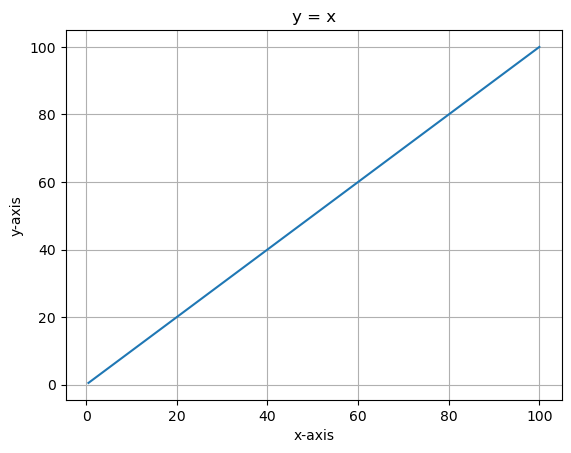

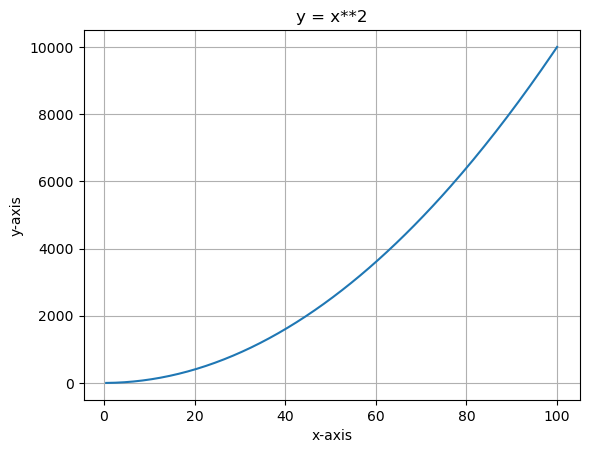

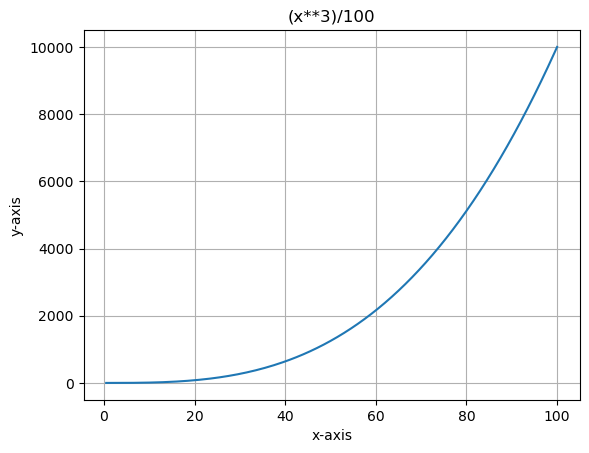

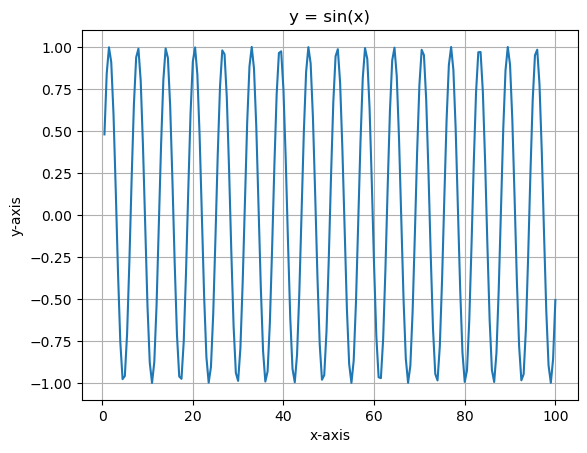

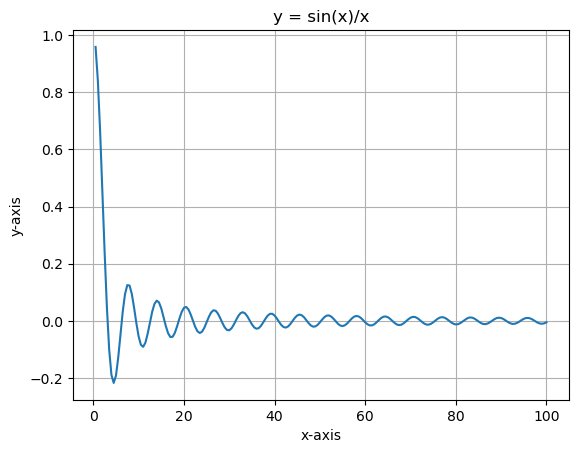

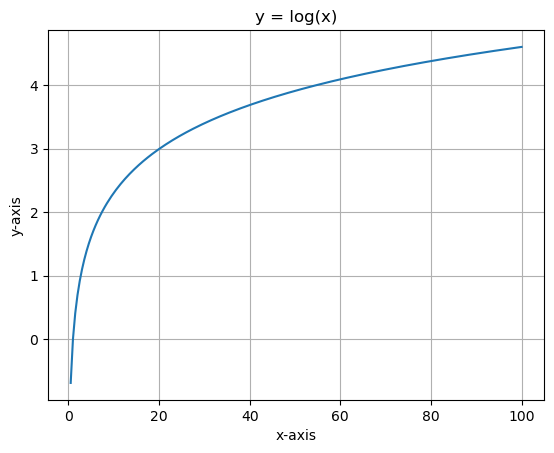

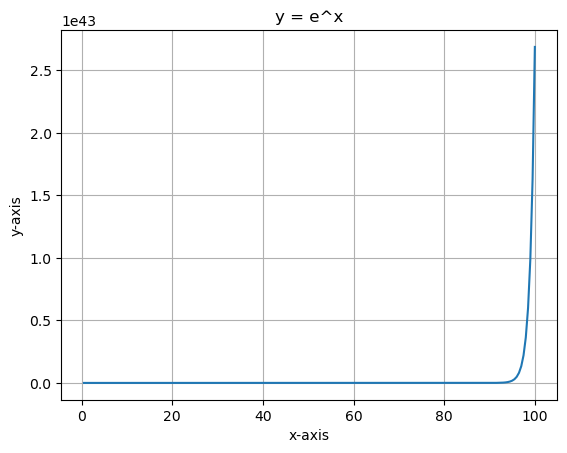

In [131]:
import numpy as np
import matplotlib.pyplot as plt

x= np.arange(0.5, 100.5, 0.5)
def plotting(y,eq):
    x= np.arange(0.5, 100.5, 0.5)   
    plt.title(eq)
    plt.plot(x,y)
    plt.ylabel('y-axis')
    plt.xlabel('x-axis')
    plt.grid(True)
    plt.show()

y1 = x
eq1 ='y = x'
y2= x**2
eq2 ='y = x**2'
y3 = (x**3)/100
eq3 = '(x**3)/100'
y4 = np.sin(x)
eq4 = 'y = sin(x)'
y5 = np.sin(x)/x
eq5 = 'y = sin(x)/x'
y6 = np.log(x)
eq6 = 'y = log(x)'
y7 = np.exp(x)
eq7 = 'y = e^x'
plotting(y1,eq1)
plotting(y2,eq2)
plotting(y3,eq3)
plotting(y4,eq4)
plotting(y5,eq5)
plotting(y6,eq6)
plotting(y7,eq7)

    
    

# Q10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [4]:
#highest standard deviation column
import numpy as np
import pandas as pd
 
n = 20
m = 5
A = [[np.random.randint(1,3) for i in range(5)]for k in range(20)]
col = ['a','b','c','d','e']
df = pd.DataFrame(A, columns = col )
dict={}
for i in col:
    dict[i] = df[i].std()
maxi_std = max(dict.values())
highest_std_key = [key for key, value in dict.items() if value == maxi_std]
print("The columns with the highest standard deviation is:",highest_std_key)




The columns with the highest standard deviation is: ['b']


In [18]:
# row with lowest mean
row_mean = df.mean(axis=1)
row_smean = row_mean.idxmin()
print(df.loc[[row_smean]])



    a  b  c  d  e
12  1  1  1  1  1


# Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [82]:
#adding 'f' to dataframe df
df['f'] = df[col].sum(axis=1)
#creating 'g' 
df['g'] = np.where(df['f'] < 8, 'LT8','GT8')

# Finding the number of rows in the dataframe where the value in the column “g” is “LT8”
lt8_rows= (df[df['g']=='LT8'])
print('no. of rows where g is lt8 is:',lt8_rows.shape[0])

#std for lt8
std_lt8 = (df[df['g']=='LT8'])['f'].std()
print('standard deviation of f for lt8 is:',std_lt8)
#std for gt8
std_gt8 = (df[df['g']=='GT8'])['f'].std()
print('standard deviation of f for gt8 is:',std_gt8)

no. of rows where g is lt8 is: 9
standard deviation of f for lt8 is: 0.8819171036881968
standard deviation of f for gt8 is: 0.5222329678670935


# Q12. Write a small piece of code to explain broadcasting in numpy.

In [138]:
# Broadcasting is a numpy powerful tool that allows us to do arithmetic operations on arrays with different shapes. 
# We can also add a scalar to arrays.
# It allows us to do all these operations without explicitly looping through all elements.

import numpy as np
A = np.array([[1,2,3],[4,5,6]])
B = np.array([3,5,7])

#printing addition of 1D array and 2D array
print('different dimensional arrays addition:', A+B)

C = 10

#printing scalar to the 2D array
print('\nscaler added 2D array:', A+C)

#multiplying 2D array with scalar

print('\nscalar multiplied 2D array is:', A*C)

different dimensional arrays addition: [[ 4  7 10]
 [ 7 10 13]]

scaler added 2D array: [[11 12 13]
 [14 15 16]]

scalar multiplied 2D array is: [[10 20 30]
 [40 50 60]]


# Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [2]:
import numpy as np

a= np.array(list(map(int,input().split())))
def min_index(a):
    
    min = a[0]
    for i in range(1,len(a)):
        if a[i]<min:
            min = i
    print('without using np.argim the minimum number index is:', min)
min_index(a)
print('with using np.argmin the minimum number index is:', np.argmin(a))

 2 4 6 7 9 1 5


without using np.argim the minimum number index is: 5
with using np.argmin the minimum number index is: 5
